In [1]:
!pip install -U seaborn

Requirement already up-to-date: seaborn in /anaconda3/lib/python3.7/site-packages (0.9.0)
You are using pip version 19.0.2, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
!pip install category_encoders

You are using pip version 19.0.2, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, \
                                 LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, \
                            mean_absolute_error

In [4]:
!ls -l

total 3120
-rw-r--r--  1 samirgadkari  staff     219 Mar 12 18:29 Pipfile
-rw-r--r--  1 samirgadkari  staff   15535 Mar 12 18:29 Pipfile.lock
-rw-r--r--@ 1 samirgadkari  staff   44028 Mar 11 10:25 Pokemon.csv
-rw-r--r--@ 1 samirgadkari  staff   44026 Mar 14 09:59 Pokemon_cleaned.csv
-rw-r--r--  1 samirgadkari  staff   27614 Mar 13 15:39 decks.csv
-rw-r--r--  1 samirgadkari  staff   23163 Mar 13 12:59 decks.csv.saved
-rw-r--r--  1 samirgadkari  staff    2471 Mar 13 15:40 decks.py
-rwxr-xr-x  1 samirgadkari  staff    1462 Mar 12 13:39 mongodb_get.py
-rw-r--r--  1 samirgadkari  staff    3707 Mar 12 13:48 moves.py
-rw-r--r--  1 samirgadkari  staff  391718 Mar 14 13:11 pokemon.ipynb
-rw-r--r--  1 samirgadkari  staff   41961 Mar 14 09:59 pokemon_all.csv
-rw-r--r--  1 samirgadkari  staff  981179 Mar 11 22:09 pokemon_moves.csv


In [5]:
df = pd.read_csv('./Pokemon.csv')
df.shape

(800, 13)

In [6]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## Clean the file so it can be imported into MongoDB Atlas

### MongoDB thinks a period implies a sublevel. 'Sp. Atk' and 'Sp. Def' are converted into {'Sp': {'Atk', 'Def'}}. So remove the period.

In [7]:
df = df.rename(columns={'Sp. Atk': 'Sp Atk', 'Sp. Def': 'Sp Def'})

In [8]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp Atk,Sp Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [9]:
df.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp Atk         int64
Sp Def         int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [10]:
df.Name = df.Name.str.strip()
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp Atk,Sp Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [11]:
df['Type 1'] = df['Type 1'].str.strip()
df['Type 2'] = df['Type 2'].str.strip()
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp Atk,Sp Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [12]:
df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp Atk          0
Sp Def          0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [13]:
df = df.fillna('')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp Atk,Sp Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,,309,39,52,43,60,50,65,1,False


In [14]:
df.to_csv('./Pokemon_cleaned.csv', index=False)

## Get some basic statistics

In [15]:
df.Generation.value_counts()

1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64

In [16]:
pokemon_type_counts = df.groupby(['Type 1', 'Type 2']).Name.count()
pokemon_type_counts = pokemon_type_counts.unstack().fillna(0)
pokemon_type_counts

Type 2,,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Type 1,,,,,,,,,,,,,,,,,,,
Bug,17.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,14.0,1.0,6.0,2.0,0.0,0.0,12.0,0.0,3.0,7.0,1.0
Dark,10.0,0.0,0.0,3.0,0.0,0.0,2.0,3.0,5.0,2.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,2.0,0.0
Dragon,11.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,6.0,0.0,0.0,5.0,3.0,0.0,0.0,4.0,0.0,0.0,0.0
Electric,27.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,5.0,1.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,3.0,1.0
Fairy,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fighting,20.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0
Fire,28.0,0.0,0.0,1.0,0.0,0.0,7.0,0.0,6.0,0.0,0.0,3.0,0.0,2.0,0.0,2.0,1.0,1.0,1.0
Flying,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ghost,10.0,0.0,1.0,2.0,0.0,0.0,0.0,3.0,2.0,0.0,10.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0


In [17]:
pokemon_type_counts

Type 2,,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Type 1,,,,,,,,,,,,,,,,,,,
Bug,17.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,14.0,1.0,6.0,2.0,0.0,0.0,12.0,0.0,3.0,7.0,1.0
Dark,10.0,0.0,0.0,3.0,0.0,0.0,2.0,3.0,5.0,2.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,2.0,0.0
Dragon,11.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,6.0,0.0,0.0,5.0,3.0,0.0,0.0,4.0,0.0,0.0,0.0
Electric,27.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,5.0,1.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,3.0,1.0
Fairy,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fighting,20.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0
Fire,28.0,0.0,0.0,1.0,0.0,0.0,7.0,0.0,6.0,0.0,0.0,3.0,0.0,2.0,0.0,2.0,1.0,1.0,1.0
Flying,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ghost,10.0,0.0,1.0,2.0,0.0,0.0,0.0,3.0,2.0,0.0,10.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0


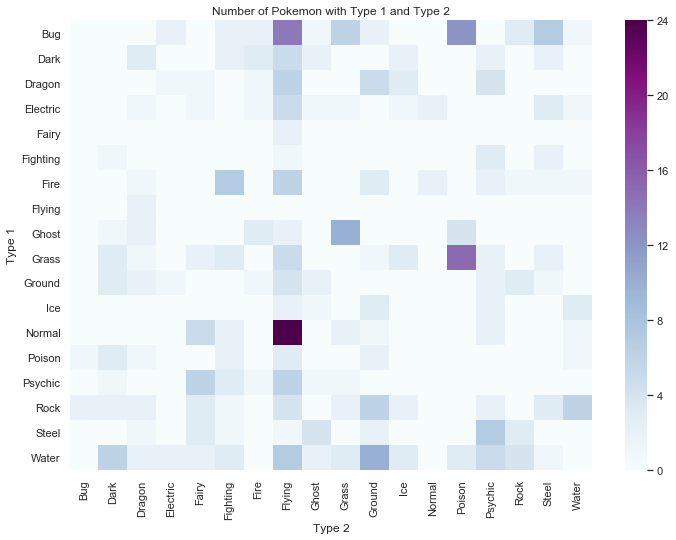

In [18]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(pd.DataFrame(pokemon_type_counts).iloc[:,1:], cmap='BuPu');
plt.title('Number of Pokemon with Type 1 and Type 2');

In [19]:
df['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [20]:
df['Type 2'].unique()

array(['Poison', '', 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

### Type 1 and Type 2 contain a value from the same list of types.

## Process the moves file created using the pokebase library

In [21]:
moves = pd.read_csv('./Pokemon_moves.csv', header=0)

In [22]:
moves.head()

,Name,Move,Move_points
0,Bulbasaur,razor-wind,80.0
1,Bulbasaur,swords-dance,NaN
2,Bulbasaur,cut,50.0
3,Bulbasaur,bind,15.0
4,Bulbasaur,vine-whip,45.0


In [23]:
moves = moves.groupby('Name').agg(sum)

In [24]:
moves.head()

,Move_points
Name,
Abomasnow,3005.0
Abra,2960.0
Absol,4770.0
Accelgor,1775.0
Aerodactyl,3860.0


In [25]:
df = df.set_index('Name')
df.head()

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp Atk,Sp Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,,309,39,52,43,60,50,65,1,False


In [26]:
df_all = df.merge(moves, left_on='Name', right_on='Name')
df_all.head()

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp Atk,Sp Def,Speed,Generation,Legendary,Move_points
Name,,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False,2555.0
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False,1850.0
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False,2880.0
Charmander,4,Fire,,309,39,52,43,60,50,65,1,False,4305.0
Charmeleon,5,Fire,,405,58,64,58,80,65,80,1,False,3825.0


In [27]:
df_all = df_all.reset_index()
df_all.head()

,Name,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp Atk,Sp Def,Speed,Generation,Legendary,Move_points
0,Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False,2555.0
1,Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False,1850.0
2,Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False,2880.0
3,Charmander,4,Fire,,309,39,52,43,60,50,65,1,False,4305.0
4,Charmeleon,5,Fire,,405,58,64,58,80,65,80,1,False,3825.0


In [28]:
df_all.to_csv('./pokemon_all.csv', index=False)

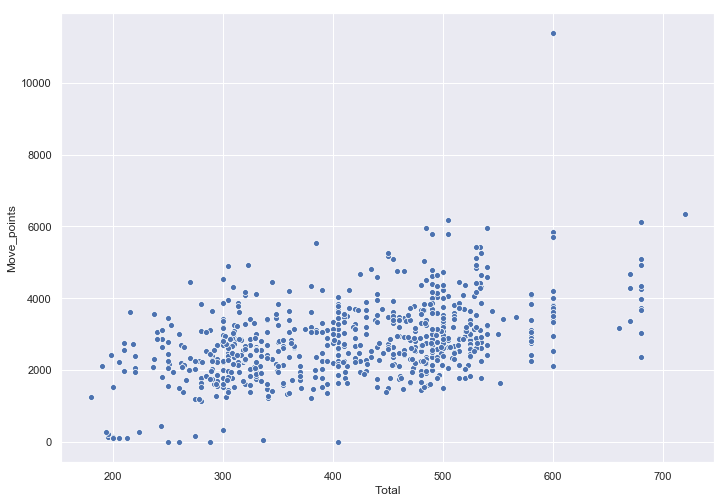

In [29]:
sns.scatterplot(data=df_all, x='Total', y='Move_points');

In [30]:
df_all['Atk_plus_Def'] = df_all.Attack + df_all.Defense + df_all['Sp Atk'] + df_all['Sp Def']
df_all.head()

,Name,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp Atk,Sp Def,Speed,Generation,Legendary,Move_points,Atk_plus_Def
0,Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False,2555.0,228
1,Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False,1850.0,285
2,Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False,2880.0,365
3,Charmander,4,Fire,,309,39,52,43,60,50,65,1,False,4305.0,205
4,Charmeleon,5,Fire,,405,58,64,58,80,65,80,1,False,3825.0,267


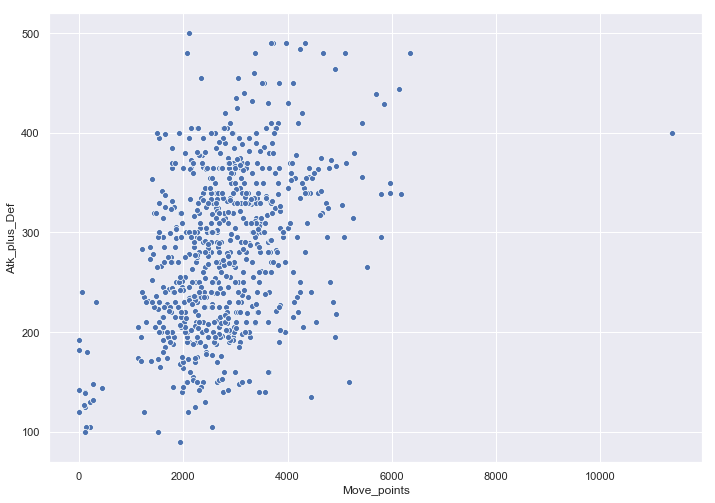

In [31]:
sns.scatterplot(data=df_all, x='Move_points', y='Atk_plus_Def');

### By finding the move points, all I've done is created another metric for attack + defense. Also, this data is not full. It's missing a lot of moves, because those moves have no points associated with them. (ex. Amnesia, Attract, Bide, Captivate, Charm, COnfide, Curse, ...). Almost half of the moves don't have points. Moving on ...

## Process the decks file created by web-scraping

In [32]:
decks = pd.read_csv('./decks.csv', header=0)
decks.head()

,Deck,Points,Card Count,Name
0,Zoroark,7319,4.00,Zorua
1,Zoroark,7319,4.00,Zoroark-GX
2,Zoroark,7319,2.04,Lycanroc-GX
3,Zoroark,7319,2.04,Tapu Lele-GX
4,Zoroark,7319,1.71,Rockruff


In [33]:
decks_analyzed = decks.groupby('Name').Points.mean().to_frame()
decks_analyzed['Size'] = decks.groupby('Name').Points.size()
decks_analyzed.head()

,Points,Size
Name,,
Absol,859.555556,9
Accelgor,56.000000,1
Aerodactyl,30.000000,1
Alolan Exeggutor,50.000000,1
Alolan Grimer,4514.200000,5


In [34]:
original_merge_decks = df.merge(decks_analyzed, on='Name')
original_merge_decks = original_merge_decks.reset_index()
print('Number of Pokemon in common with Decks and Kaggle:', 
      original_merge_decks.shape[0])
original_merge_decks.head()

Number of Pokemon in common with Decks and Kaggle: 155


,Name,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp Atk,Sp Def,Speed,Generation,Legendary,Points,Size
0,Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False,12.0,1
1,Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False,12.0,1
2,Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False,12.0,1
3,Charmander,4,Fire,,309,39,52,43,60,50,65,1,False,9.0,1
4,Charmeleon,5,Fire,,405,58,64,58,80,65,80,1,False,9.0,1


## Use One-hot encoding and Logistic Regression on merged data

In [35]:
df2 = original_merge_decks[['Name', 'Points', 'Size']]
df2.head()

,Name,Points,Size
0,Bulbasaur,12.0,1
1,Ivysaur,12.0,1
2,Venusaur,12.0,1
3,Charmander,9.0,1
4,Charmeleon,9.0,1


In [36]:
deck_and_name = decks.copy()

### Rank Pokemon in this deck based on the Total column in the original deck

In [37]:
sorted_name_total = df.reset_index()[['Name', 'Total']] \
                      .sort_values(by='Total', axis=0, ascending=False)
sorted_name_total['Rank'] = np.linspace(1, sorted_name_total.shape[0], 
                                       sorted_name_total.shape[0]).astype(int)
sorted_name_total['Name'] = sorted_name_total['Name'].str.lower()
sorted_name_total.head()

,Name,Total,Rank
426,rayquazamega rayquaza,780,1
164,mewtwomega mewtwo y,780,2
163,mewtwomega mewtwo x,780,3
422,kyogreprimal kyogre,770,4
424,groudonprimal groudon,770,5


In [38]:
deck_and_name['Name'] = deck_and_name['Name'].str.lower()
deck_and_name['Rank'] = np.array([None] * len(deck_and_name)).reshape(-1, 1)
deck_and_name.head()

,Deck,Points,Card Count,Name,Rank
0,Zoroark,7319,4.00,zorua,None
1,Zoroark,7319,4.00,zoroark-gx,None
2,Zoroark,7319,2.04,lycanroc-gx,None
3,Zoroark,7319,2.04,tapu lele-gx,None
4,Zoroark,7319,1.71,rockruff,None


In [39]:
# deck_and_name['Rank'] = sorted_name_total[deck_and_name.Name == sorted_name_total.Name].Rank
# This function fails with:
#   Can only compare identically-labeled Series objects
# This is because the indices of one do not match the indices of the other.
# You can sort the two indices to be the same and then try:
#   sorted_name_total = sorted_name_total.sort_index()
# Also make sure the shapes of the two series objects are the same

for i in range(len(deck_and_name)):
    actual_name = deck_and_name.iloc[i, 3]
    name = deck_and_name.iloc[i, 3]
    rank = None
    for j in range(len(sorted_name_total)):
        if name == sorted_name_total.iloc[j, 0]:
            rank = sorted_name_total.iloc[j, 2]
            break
    deck_and_name.iloc[i, 4] = rank
deck_and_name.head()

,Deck,Points,Card Count,Name,Rank
0,Zoroark,7319,4.00,zorua,593
1,Zoroark,7319,4.00,zoroark-gx,None
2,Zoroark,7319,2.04,lycanroc-gx,None
3,Zoroark,7319,2.04,tapu lele-gx,None
4,Zoroark,7319,1.71,rockruff,None


In [40]:
deck_and_name['Rank'] = deck_and_name['Rank'].apply(lambda x: int(x) if (x != None) else None)

In [41]:
deck_and_name.dtypes

Deck           object
Points          int64
Card Count    float64
Name           object
Rank          float64
dtype: object

In [42]:
deck_and_name = deck_and_name.set_index(['Name'])

In [43]:
deck_and_name.head()

,Deck,Points,Card Count,Rank
Name,,,,
zorua,Zoroark,7319,4.00,593.0
zoroark-gx,Zoroark,7319,4.00,NaN
lycanroc-gx,Zoroark,7319,2.04,NaN
tapu lele-gx,Zoroark,7319,2.04,NaN
rockruff,Zoroark,7319,1.71,NaN


In [44]:
enc = ce.OneHotEncoder()
enc.fit(deck_and_name)     # Encoder only encodes the categorical variables
enc.get_params()

{'cols': ['Deck'],
 'drop_invariant': False,
 'handle_unknown': 'impute',
 'impute_missing': True,
 'return_df': True,
 'use_cat_names': False,
 'verbose': 0}

In [45]:
print(deck_and_name.shape)
deck_and_name.reset_index().Name.value_counts().values[:20]

(893, 4)


array([58, 31, 24, 20, 18, 17, 15, 13, 13, 13, 12, 12, 12, 11, 10,  9,  9,
        9,  9,  8])

In [46]:
transformed = enc.transform(deck_and_name)
print('transformed shape:', transformed.shape)
transformed.head()

transformed shape: (893, 93)


,Deck_1,Deck_2,Deck_3,Deck_4,Deck_5,Deck_6,Deck_7,Deck_8,Deck_9,Deck_10,...,Deck_84,Deck_85,Deck_86,Deck_87,Deck_88,Deck_89,Deck_-1,Points,Card Count,Rank
Name,,,,,,,,,,,,,,,,,,,,,
zorua,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7319,4.00,593.0
zoroark-gx,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7319,4.00,NaN
lycanroc-gx,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7319,2.04,NaN
tapu lele-gx,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7319,2.04,NaN
rockruff,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7319,1.71,NaN


In [47]:
transformed = transformed.reset_index()
print('transformed shape:', transformed.shape)
transformed.head()

transformed shape: (893, 94)


,Name,Deck_1,Deck_2,Deck_3,Deck_4,Deck_5,Deck_6,Deck_7,Deck_8,Deck_9,...,Deck_84,Deck_85,Deck_86,Deck_87,Deck_88,Deck_89,Deck_-1,Points,Card Count,Rank
0,zorua,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7319,4.00,593.0
1,zoroark-gx,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7319,4.00,NaN
2,lycanroc-gx,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7319,2.04,NaN
3,tapu lele-gx,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7319,2.04,NaN
4,rockruff,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7319,1.71,NaN


In [48]:
transformed.Name.value_counts().values[:20]

array([58, 31, 24, 20, 18, 17, 15, 13, 13, 13, 12, 12, 12, 11, 10,  9,  9,
        9,  9,  8])

In [49]:
df2 = df.copy()
df2 = df2.reset_index()
df2['Name'] = df2['Name'].str.lower()
df2 = df2.set_index('Name')
df2.head()

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp Atk,Sp Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
venusaurmega venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
charmander,4,Fire,,309,39,52,43,60,50,65,1,False


In [50]:
truncated = transformed[transformed.Name.isin(df2.index.values)]
truncated.shape

(390, 94)

In [51]:
truncated.sort_values(by='Name').head()

,Name,Deck_1,Deck_2,Deck_3,Deck_4,Deck_5,Deck_6,Deck_7,Deck_8,Deck_9,...,Deck_84,Deck_85,Deck_86,Deck_87,Deck_88,Deck_89,Deck_-1,Points,Card Count,Rank
149,absol,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,741,0.68,364.0
70,absol,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1812,0.06,364.0
432,absol,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,151,0.50,364.0
457,absol,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,146,0.50,364.0
847,absol,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,9,1.00,364.0


In [52]:
pd.set_option('display.max_columns', None)  # unlimited columns

In [53]:
print('Num rows:', truncated.shape[0])
print('Unique pokemon:', truncated.Name.nunique())

Num rows: 390
Unique pokemon: 155


In [54]:
truncated.Name.value_counts().values[:20]

array([18, 17, 13, 12, 12, 11,  9,  8,  8,  7,  7,  7,  7,  6,  6,  6,  6,
        6,  5,  5])

### Let's try to regress the deck one-hot encoded values (from the card game) against the Pokemon Rank (from the video game)

In [55]:
X = truncated.iloc[:, 1:-3]  # All columns except Name, Points, Card Count, Rank
y = truncated.iloc[:, 0]     # against Rank.

X_train, X_test, y_train, y_test = train_test_split(X, y)
model = LogisticRegression()  # Using Logistic Regression
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.061224489795918366

In [69]:
X = transformed.iloc[:, 1:-3] # All columns except Name, Points, Card Count, Rank
y = transformed.iloc[:, 0]    # against Rank.
X_train, X_test, y_train, y_test = train_test_split(X, y)

param_grid = {
    'n_estimators': [5, 10, 20, 25],
    'max_depth': [5, 10, 15, 20, 25, 30]
}

gridsearch = GridSearchCV(RandomForestClassifier(n_jobs=-1),
                          param_grid=param_grid, cv=3,
                          return_train_score=True)
gridsearch.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [5, 10, 20, 25], 'max_depth': [5, 10, 15, 20, 25, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

### GridSearch does not like that we have some class with only one member in the fold. Do the basic RandomForestClassifier instead.

In [70]:
model = RandomForestClassifier()  # Using RandomForest classifier
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.022321428571428572

### Looks like the Logistic Regression is a little bit better (accuracy 0.06) than Random Forest (accuracy 0.02), but both are really bad fits. 
### Random Forest does bettwe with fractional values since each Decision Tree tries to split the feature space. With one-hot encoded values, they're just 1 or 0, so not much it can do

### Now let's regress
  - Deck one-hot encoded values + Points + Card Counts against the Rank (all from the card game)
  - Deck Points + Card Counts against the Rank (all from the card game)

### Let's try plotting the features against the target to see if there is a pattern

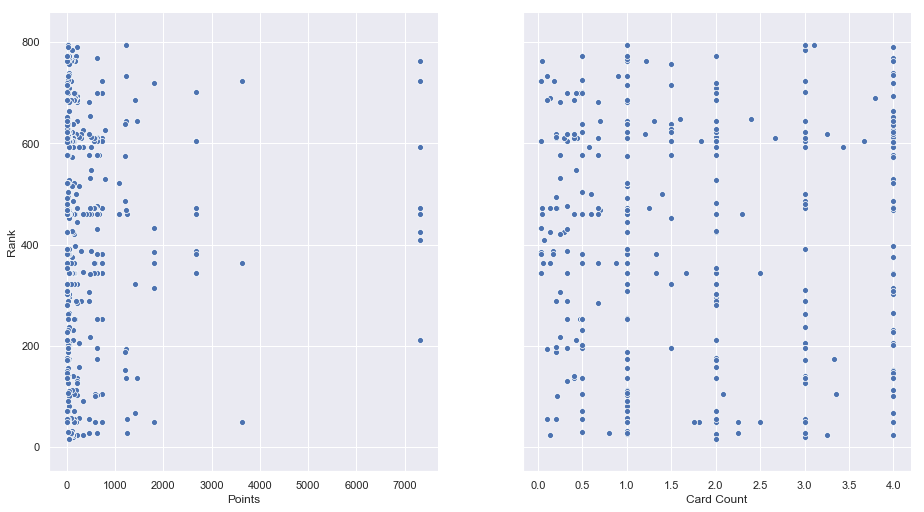

In [57]:
# g is the pairgrid which can be tweaked further
g = sns.pairplot(data=truncated, x_vars=['Points', 'Card Count'], y_vars='Rank');
g.fig.set_size_inches(15,10)

In [58]:
X = truncated.iloc[:, 1:-1] # All columns except the Name and Rank
y = truncated.iloc[:, -1]   # against Rank.

X_train, X_test, y_train, y_test = train_test_split(X, y)
model = LinearRegression()  # Using Linear Regression
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_absolute_error(y_test, y_pred)

198.63351912034915

In [59]:
X = truncated.iloc[:, -3:-1] # Just include Points and Card Count
y = truncated.iloc[:, -1]    # against the Rank.

X_train, X_test, y_train, y_test = train_test_split(X, y)
model = LinearRegression()  # Using Linear Regression
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_absolute_error(y_test, y_pred)

199.3733175547191

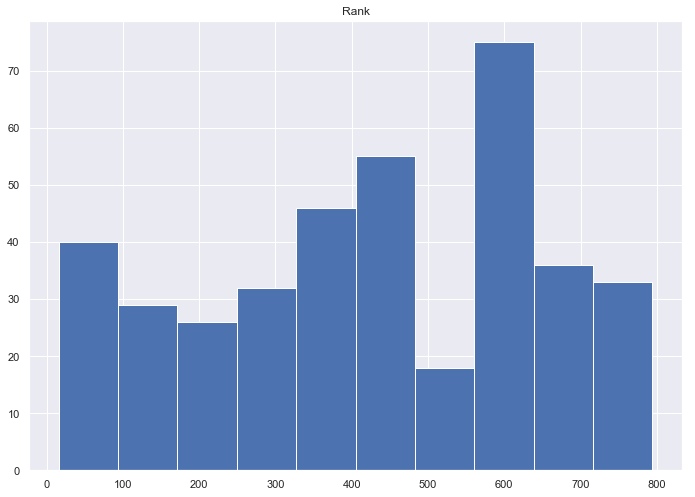

In [60]:
truncated.hist(column=['Rank']);

### The mean_absolute_error value is 194. This is in comparion to a range of Rank values from 1 through 800. If we're off by almost 200 in Rank, it is not a good fit at all.